# Partial-blockage Analysis

## load tables

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
agents_number_df = pd.read_csv('./agents_results.csv')
agents_number_df = agents_number_df.drop_duplicates(subset='damage')
agents_number_df = agents_number_df.groupby(['planner', 'num_agents'], as_index=False).mean()
agents_number_df.head()

,planner,num_agents,num_robots,d,completion_time,planner_time,damage,num_disabled
0,Additive100StaticLackPlanner,100,5.0,5.0,289.021946,0.060925,24519.685806,20.4
1,Additive100StaticLackPlanner,200,5.0,5.0,293.834245,0.105812,49414.423809,37.3
2,Additive100StaticLackPlanner,300,5.0,5.0,296.789991,0.193622,74075.000743,62.8
3,Additive100StaticLackPlanner,400,5.0,5.0,297.416235,0.394197,98762.277380,85.9
4,Additive100StaticLackPlanner,500,5.0,5.0,297.222438,0.576642,123461.156841,112.2


In [28]:
f_df = pd.read_csv('./f_results.csv')
f_df = f_df.drop_duplicates(subset='damage')
f_df = f_df.loc[(f_df['num_agents'] == 200)]
f_df = f_df.groupby(['planner','num_agents','f'], as_index=False).mean()
f_df.head()

,planner,num_agents,f,num_robots,d,active_time,completion_time,planner_time,damage,num_disabled
0,IterativeAssignmentPlanner,200,1.1,5.0,5.0,1551.939609,1551.939609,0.709559,130430.907010,200.0
1,IterativeAssignmentPlanner,200,1.2,5.0,5.0,964.071445,964.071445,0.582133,76656.548872,200.0
2,IterativeAssignmentPlanner,200,1.3,5.0,5.0,731.415462,731.415462,0.621971,56521.152183,200.0
3,IterativeAssignmentPlanner,200,1.4,5.0,5.0,593.538810,593.538810,0.617540,45803.978075,200.0
4,IterativeAssignmentPlanner,200,1.5,5.0,5.0,506.707575,506.707575,0.725215,38956.520981,200.0


In [29]:
robots_df = pd.read_csv('./robots_results.csv')
robots_df = robots_df.drop_duplicates(subset=['planner', 'damage'])
robots_df = robots_df.loc[(robots_df['num_agents'] == 300)]
robots_df = robots_df.groupby(['planner', 'num_robots'], as_index=False).mean()
robots_df.head()

,planner,num_robots,num_agents,f,d,completion_time,planner_time,damage,num_disabled
0,Additive100StaticLackPlanner,2,300.0,2.0,5.0,296.067522,0.118917,74135.078967,56.400000
1,Additive100StaticLackPlanner,3,300.0,2.0,5.0,296.223145,0.150640,73985.727370,62.066667
2,Additive100StaticLackPlanner,4,300.0,2.0,5.0,296.392819,0.167260,73911.385692,60.653846
3,Additive100StaticLackPlanner,5,300.0,2.0,5.0,296.857280,0.251480,73980.441761,64.320000
4,Additive100StaticLackPlanner,6,300.0,2.0,5.0,296.793421,0.261196,73976.182072,60.428571


## visualizations

In [31]:
planners_colors = {'IterativeAssignmentPlanner': 'red',
                   'KmeansAssignmentPlanner': 'brown',
                   'StaticLineLackPlanner': 'blue',
                   'SeparateStaticLackPlanner1': 'green',
                   'SeparateStaticLackPlanner': 'lightgreen',
                   'Additive25StaticLackPlanner': 'navajowhite',
                   'Additive50StaticLackPlanner': 'burlywood',
                   'Additive100StaticLackPlanner': 'orange'}

In [32]:
from typing import List


def visualize(X: List[str], Y: List[str], data, file_to_save: str, title: str):
    plt.figure(figsize=(14, 10))
    plt.suptitle(title, fontsize=18)

    for i in range(len(Y)):
        x, y = X[i], Y[i]

        plt.subplot(2, 2, i + 1)
        plt.xlabel(x)
        plt.ylabel(y)
        for j in range(len(data)):
            r = data[j]
            plt.plot(list(r[x]), list(r[y]), c=list(planners_colors.values())[j])

        if i == 1:
            plt.legend(planners_colors.keys(), fontsize='14')

    plt.savefig(file_to_save)
    plt.show()

In [33]:
def vis_paper(X: List[str], data):
    Y = ['damage', 'completion_time', 'planner_time', 'num_disabled']

    for i in range(len(Y)):
        x = X[i]
        y = Y[i]

        plt.xlabel(x)
        plt.ylabel(y)
        for j in range(len(data)):
            r = data[j]
            plt.plot(list(r[x]),list(r[y]), c=list(planners_colors.values())[j])

        if i == 0:
            plt.legend(planners_colors.keys(), fontsize='14')

        plt.savefig(f'./plots/{x}-{y}.png')
        plt.show()

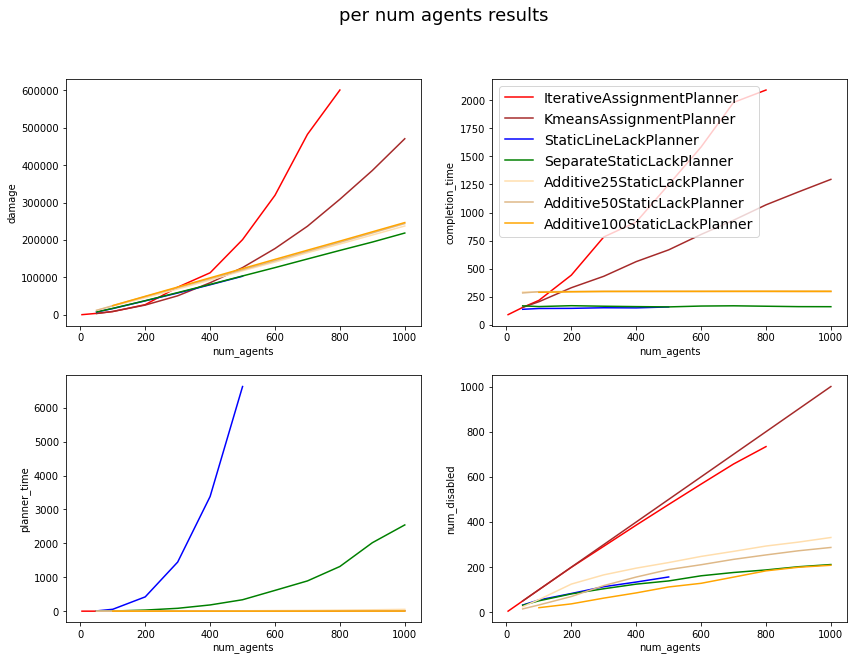

In [34]:
Y = ['damage', 'completion_time', 'planner_time', 'num_disabled']
X = ['num_agents' for _ in Y]

agents_results = [agents_number_df.loc[agents_number_df['planner'] == name] for name in planners_colors.keys()]
title = 'per num agents results'
file_to_save = './plots/partial_num_agents.png'

visualize(X, Y, agents_results, file_to_save, title)

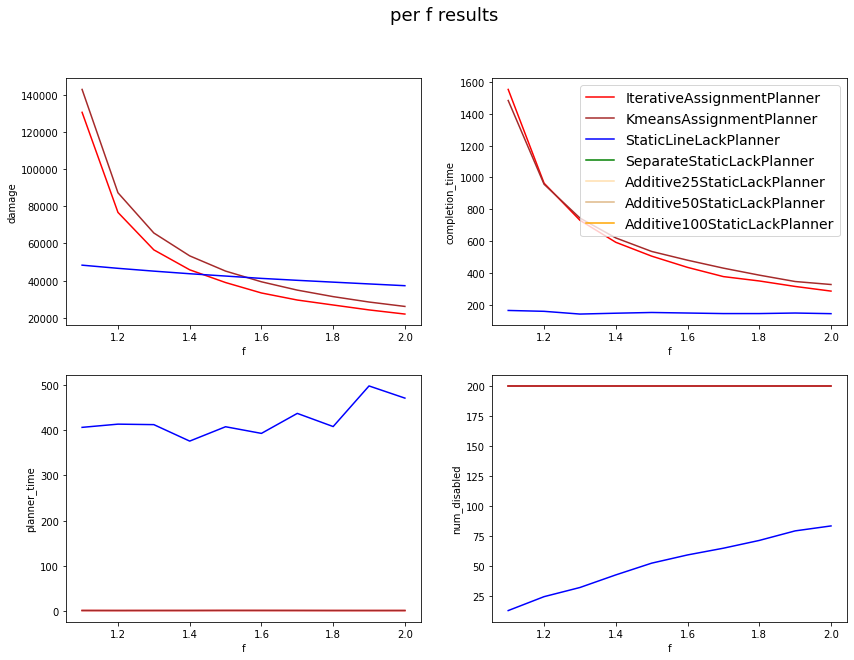

In [35]:
Y = ['damage', 'completion_time', 'planner_time', 'num_disabled']
X = ['f' for _ in Y]

f_results = [f_df.loc[f_df['planner'] == name] for name in planners_colors.keys()]
title = 'per f results'
file_to_save = './plots/partial_f.png'

visualize(X, Y, f_results, file_to_save, title)

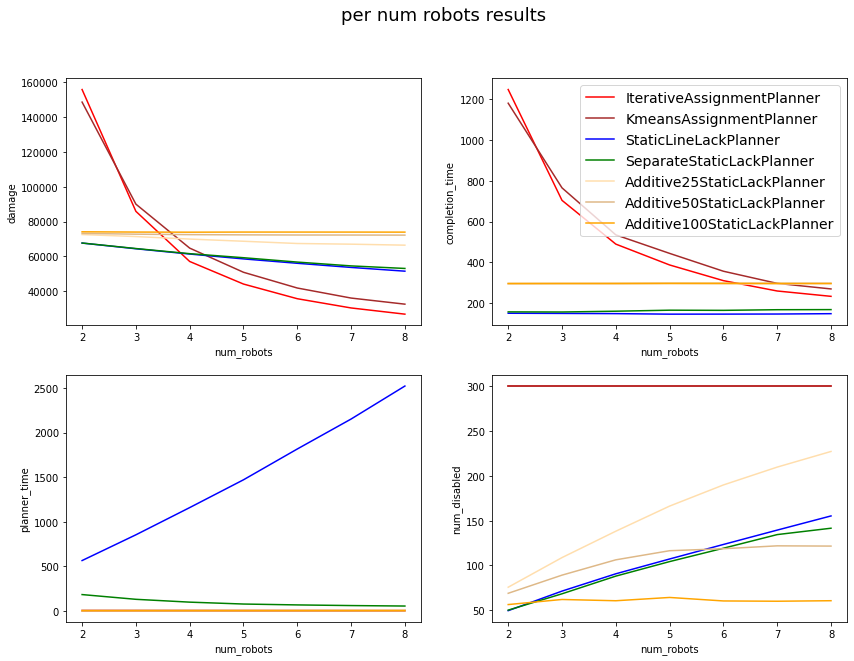

In [36]:
Y = ['damage', 'completion_time', 'planner_time', 'num_disabled']
X = ['num_robots' for _ in Y]

robots_results = [robots_df.loc[robots_df['planner'] == name] for name in planners_colors.keys()]
title = 'per num robots results'
file_to_save = './plots/partial_num_robots.png'

visualize(X, Y, robots_results, file_to_save, title)

In [36]:
## run experiments

In [ ]:
### config file

In [43]:
import json

with open('config.json') as json_file:
    config = json.load(json_file)
config

{'x_size': 100,
 'y_size_init': 100,
 'y_size': 300,
 'x_buffer': 10,
 'y_buffer': 10,
 'num_robots': 5,
 'num_agents': 10,
 'agent_speed': 1,
 'robot_speed': 2,
 'disablement_range': 1}

In [44]:
import json
import time
from random import seed

from world.agents.deterministic_agent import DeterministicAgent
from planners.deterministic.partial_blockage.additive_static_lack_planner import AdditiveStaticLackPlanner
from planners.deterministic.partial_blockage.separate_static_lack_planner import SeparateStaticLackPlanner

from planners.planner import Planner
from utils.functions import *

In [45]:
def run(planner: Planner):
    agents = [DeterministicAgent(sample_point(config['x_buffer'], config['x_buffer'] + config['x_size'],
                                              config['y_buffer'], config['y_buffer'] + config['y_size_init']),
                                 config['agent_speed']) for _ in range(config['num_agents'])]

    robots = [BasicRobot(sample_point(0, config['x_size'] + 2 * config['x_buffer'], 0, config['y_buffer']),
                         config['robot_speed'], config['disablement_range'])
              for _ in range(config['num_robots'])]

    env = Environment(agents=agents, robots=robots, border=config['y_size'] + config['y_buffer'])

    before = time.time()
    movement, completion_time, expected_damage, expected_num_disabled = planner.plan(env)
    planning_time = time.time() - before

    write_report(planner=str(planner),
                 num_agents=config['num_agents'],
                 num_robots=config['num_robots'],
                 f=config['robot_speed'] / config['agent_speed'],
                 d=config['disablement_range'],
                 active_or_copmletion_time=completion_time,
                 planner_time=planning_time,
                 damage=expected_damage,
                 num_disabled=expected_num_disabled,
                 file_name='agents_results.csv',
                 is_active_time=False)


In [46]:

planners = [SeparateStaticLackPlanner()]

for planner in planners:
    for v in [100, 200, 300, 400, 500, 600, 700, 800]:
        print(f'*** *** v={v} *** ***')
        for s in range(30):
            seed(s)

            config['num_agents'] = v
            print(f'running {str(planner)} with seed {s}..')
            run(planner)

*** *** v=100 *** ***
running SeparateStaticLackPlanner with seed 0..


TypeError: object of type 'int' has no len()